## The project (pillow, pytesseract, opencv)

In [1]:
#!conda install -c conda-forge pytesseract --yes

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
import re
import zipfile

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# the rest is up to you!


def open_archive(archive_name): #create a dictionary containg a file name and object (image)
    images=[]   
    
    with zipfile.ZipFile(archive_name,'r') as archive:
        
        for info in archive.infolist():
            
            imgdata=archive.open(info)
            images.append((Image.open(imgdata),info.filename))
        
        return images


In [2]:
def article_text(articles): #crate dictionary containg a file name and detected words as a list
    
    dict_articles={} 
    
    for image,title in articles:
        
        text = pytesseract.image_to_string(image)
        text = " ".join([re.sub(r"[^a-zA-Z0-9]+", ' ', char) for char in text.split()]) #remove special characters (eg. Mark's = Mark s) and join the whole text
        text_split= text.split() #final result is a list eg. ['Mark','s'....]
        text_split= list(dict.fromkeys(text_split)) # remove duplicates 
        dict_articles[title]=text_split
        

    return dict_articles   
      

In [3]:
def show_rects(image):   #populate detected faces into list
    
    heads = []
    new_size = 100, 100
    
    open_cv_version=image[0]
    open_cv_version.save(image[1])
    
    cv_img= cv.imread(image[1])
    faces = face_cascade.detectMultiScale(cv_img,1.15,7)  #minNeighbors=7, scale factor = 1.15


    for x,y,w,h in faces:
        bounding_box=(x,y,x+w,y+h)
        heads.append(image[0].crop(bounding_box).resize(new_size))
        
    return heads
    

In [4]:
import PIL
import math


def prepare_sheets(file): #prepare a dictionary containg a file name and a contact sheet with heads from function show_rects()
    
    contact_sheets={}
    for img in file:
        x=0
        y=0 
        
        number_of_columns = 5
        number_of_rows = int(math.ceil(len(show_rects(img))/number_of_columns)) 
    
        try: #Check if there is any face in file
            first_image=show_rects(img)[0]
            contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*number_of_columns,first_image.height*number_of_rows))
    
        except:
            continue  #Go to another file
        
        for head in show_rects(img):
            contact_sheet.paste(head, (x, y) ) #paste a head into contact sheet
        
            if  x+first_image.width == contact_sheet.width: #check if a next head needs to be pasted to another row
                x=0
                y=y+first_image.height
            else:
                x=x+first_image.width

        contact_sheets[img[1]]=contact_sheet
        
    return contact_sheets




In [5]:
def final_result(search_word,path):
    
    detected_text = article_text(open_archive(path))
    detected_faces = prepare_sheets(open_archive(path))
    
    for key in detected_text.keys():
        if search_word in detected_text[key]:
            print("Results found in file {}".format(key))
            try:
                display(detected_faces[key])
            except:
                print('But there were no faces in the file!')   

Results found in file a-0.png


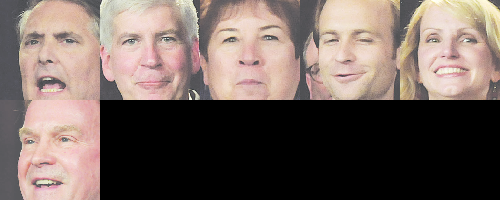

Results found in file a-3.png


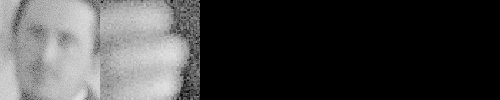

In [6]:
final_result("Christopher",'small_img.zip') 

Results found in file a-0.png


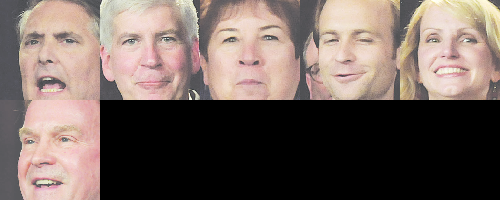

Results found in file a-1.png


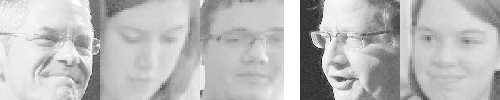

Results found in file a-13.png


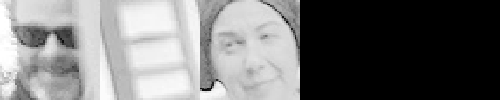

Results found in file a-2.png


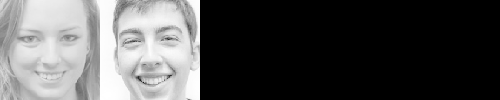

Results found in file a-3.png


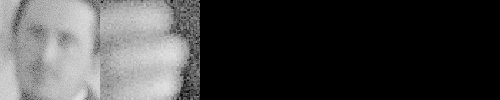

Results found in file a-8.png
But there were no faces in the file!


In [7]:
final_result("Mark",'images.zip') 